In [1]:
#biblioteki
import os
import pandas as pd


In [2]:
#import danych - https://www.kaggle.com/yasserh/walmart-dataset
#Walmart Store Sales Prediction
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/projekt pad')

base_data = pd.read_csv("Walmart.csv")
base_data.columns

train = pd.read_csv('Walmart.csv')

Mounted at /content/drive


In [3]:
train

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
train.isnull().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

In [5]:
#korelacja

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
sns.set_theme(style="darkgrid")

r = train.corr()
p = train.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*r.shape)
p = p.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
r.round(2).astype(str) + p


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.0***,-0.34***,0.0,-0.02*,0.06***,-0.21***,0.22***
Weekly_Sales,-0.34***,1.0***,0.04***,-0.06***,0.01,-0.07***,-0.11***
Holiday_Flag,0.0,0.04***,1.0***,-0.16***,-0.08***,-0.0,0.01
Temperature,-0.02*,-0.06***,-0.16***,1.0***,0.14***,0.18***,0.1***
Fuel_Price,0.06***,0.01,-0.08***,0.14***,1.0***,-0.17***,-0.03***
CPI,-0.21***,-0.07***,-0.0,0.18***,-0.17***,1.0***,-0.3***
Unemployment,0.22***,-0.11***,0.01,0.1***,-0.03***,-0.3***,1.0***


Text(8.95999999999998, 0.5, 'Ilość transakcji dla sklepu (w milionach) ')

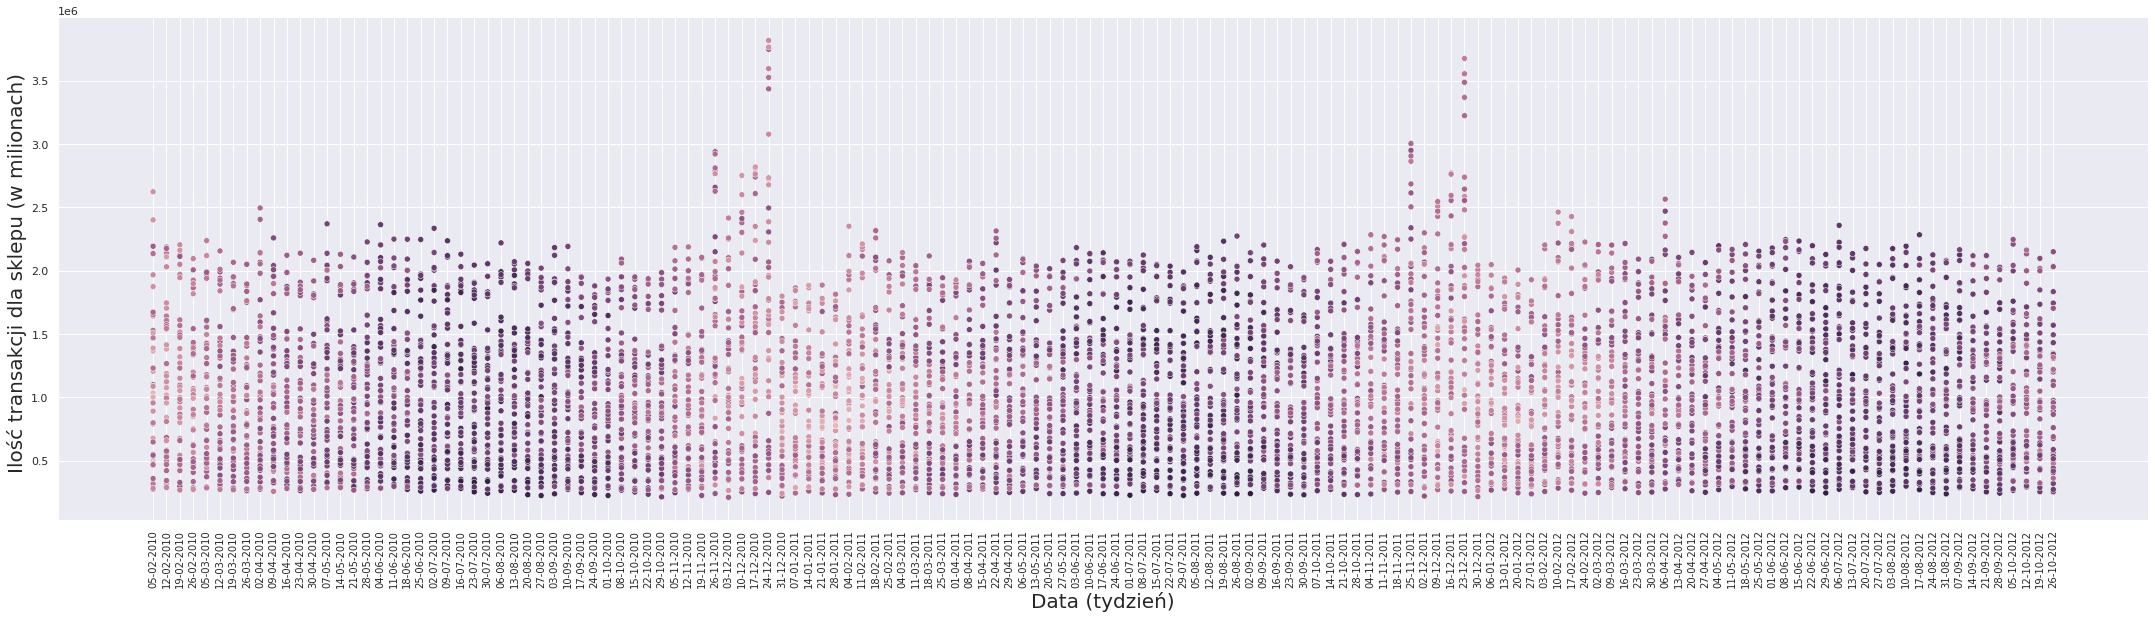

In [6]:
#Wykres 1
#Porównanie ilości transakcji na przestrzeni prawie trzech lat w sklepach Walmart. Dodatkowo kolorem 
#zaznaczono temperature gdzie ciemy kolor oznacza wyższą temperature.

sns.relplot(x="Date", y="Weekly_Sales", hue="Temperature", sizes=(15, 200), data=train, height=8, aspect=30/8, legend=False)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90, fontsize='10')
plt.xlabel('Data (tydzień)', fontsize=20)
plt.ylabel('Ilość transakcji dla sklepu (w milionach) ', fontsize=20)




Text(8.95999999999998, 0.5, 'Ilość transakcji dla sklepu 29 (w milionach) ')

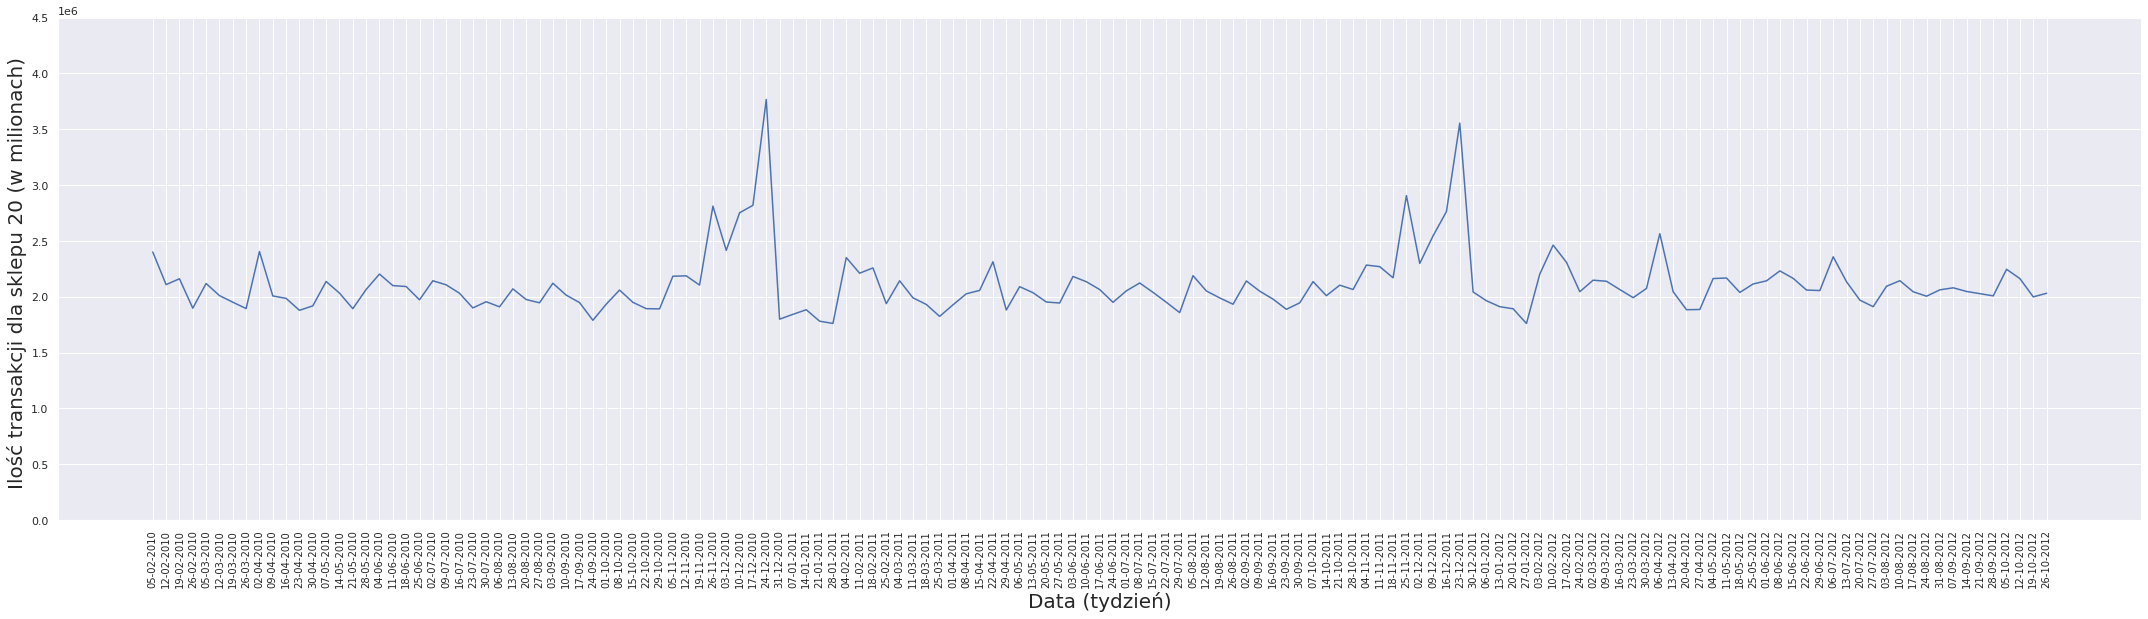

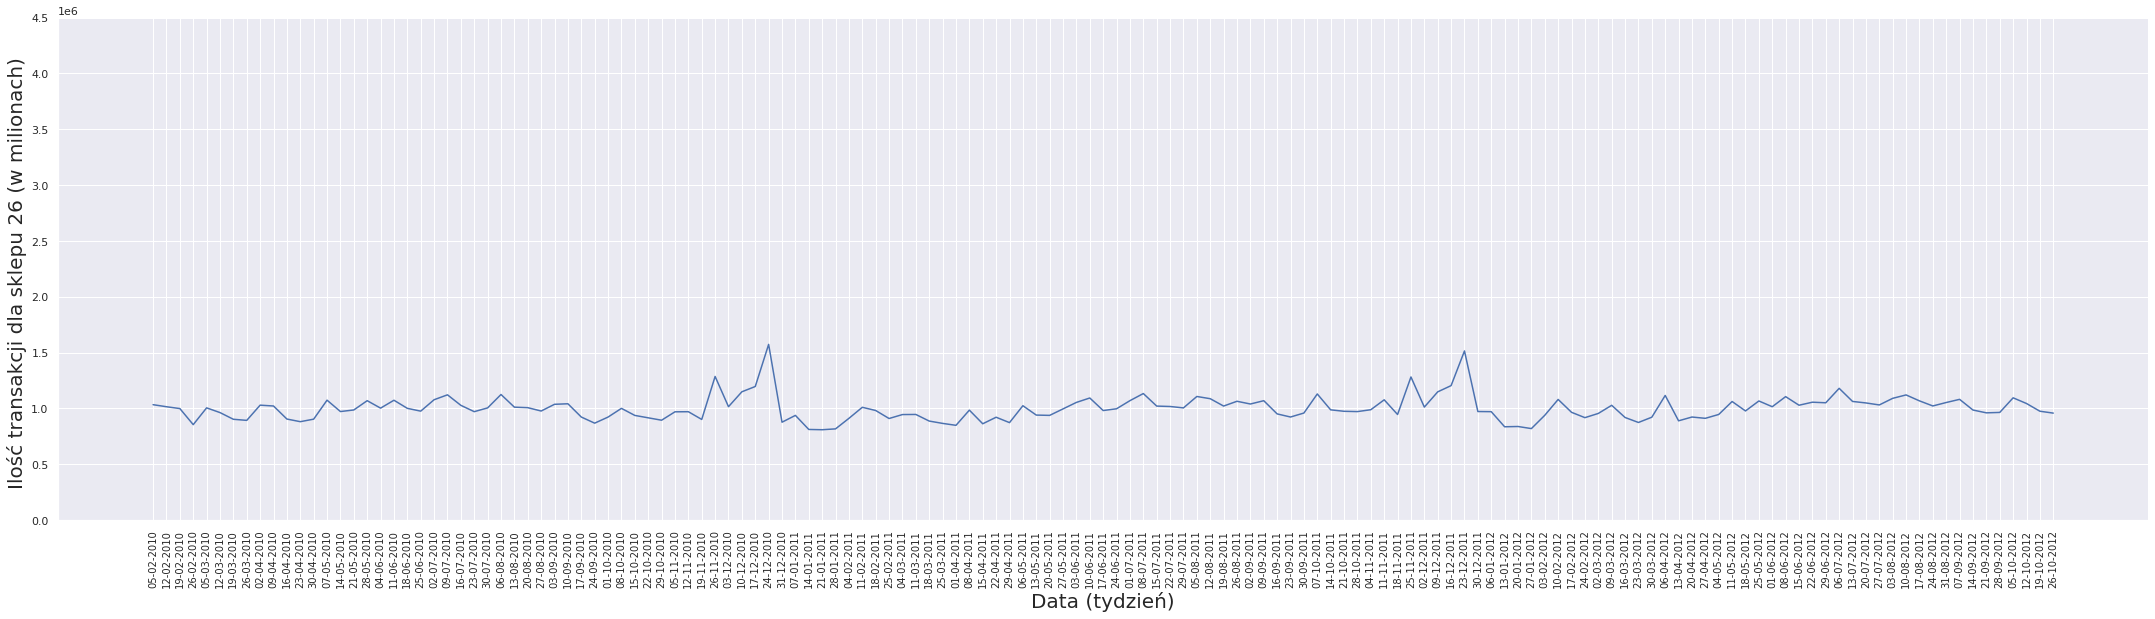

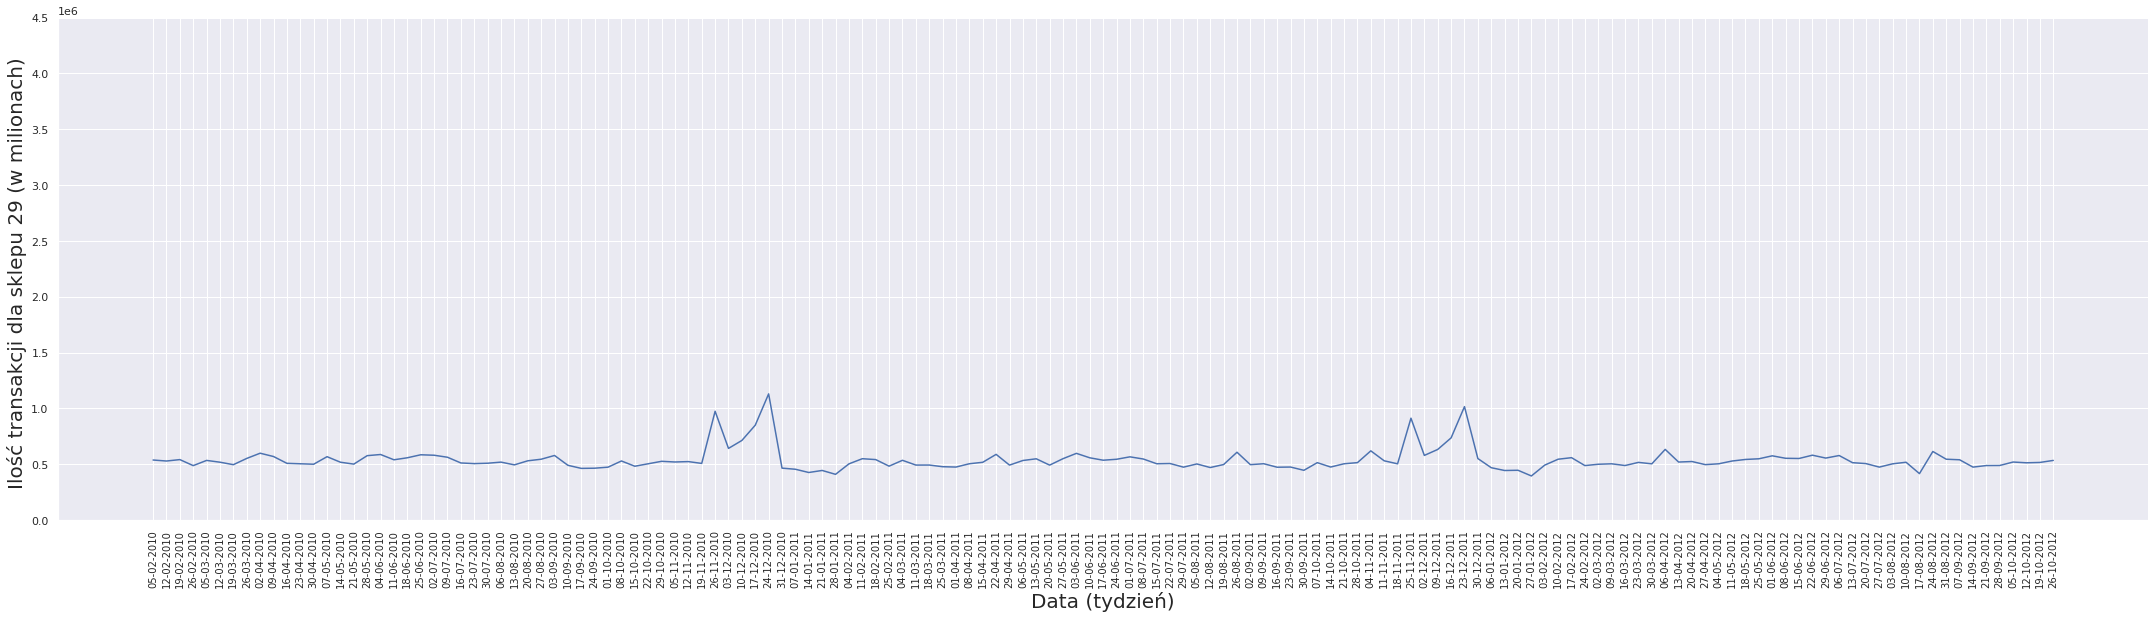

In [7]:
#wykres 2,3,4

#Są generowane trzy wykresy osobno dla ilości transakcji w czasie dla trzech losowo wybranych sklepów.

import random 

#wybranie trzech losowych numerów sklepów z kolumny Store
pom = train.Store.max()
tab = random.sample(range(1, pom), 3) 

sns.relplot(x="Date", y="Weekly_Sales", sizes=(15, 200), data=train[(train.Store == tab[0])], height=8, aspect=30/8, legend=False, kind='line')
locs, labels = plt.xticks()
plt.ylim(0, 4500000) #zachowanie skali 
plt.setp(labels, rotation=90, fontsize='10') 
plt.xlabel('Data (tydzień)', fontsize=20)
plt.ylabel('Ilość transakcji dla sklepu {} (w milionach) '.format(tab[0]), fontsize=20)

sns.relplot(x="Date", y="Weekly_Sales", sizes=(15, 200), data=train[(train.Store == tab[1])], height=8, aspect=30/8, legend=False, kind='line')
locs, labels = plt.xticks()
plt.ylim(0, 4500000)
plt.setp(labels, rotation=90, fontsize='10')
plt.xlabel('Data (tydzień)', fontsize=20)
plt.ylabel('Ilość transakcji dla sklepu {} (w milionach) '.format(tab[1]), fontsize=20)

sns.relplot(x="Date", y="Weekly_Sales", sizes=(15, 200), data=train[(train.Store == tab[2])], height=8, aspect=30/8, legend=False, kind='line')
locs, labels = plt.xticks()
plt.ylim(0, 4500000)
plt.setp(labels, rotation=90, fontsize='10')
plt.xlabel('Data (tydzień)', fontsize=20)
plt.ylabel('Ilość transakcji dla sklepu {} (w milionach) '.format(tab[2]), fontsize=20)

Text(8.95999999999998, 0.5, 'Ilość transakcji dla sklepu (w milionach) ')

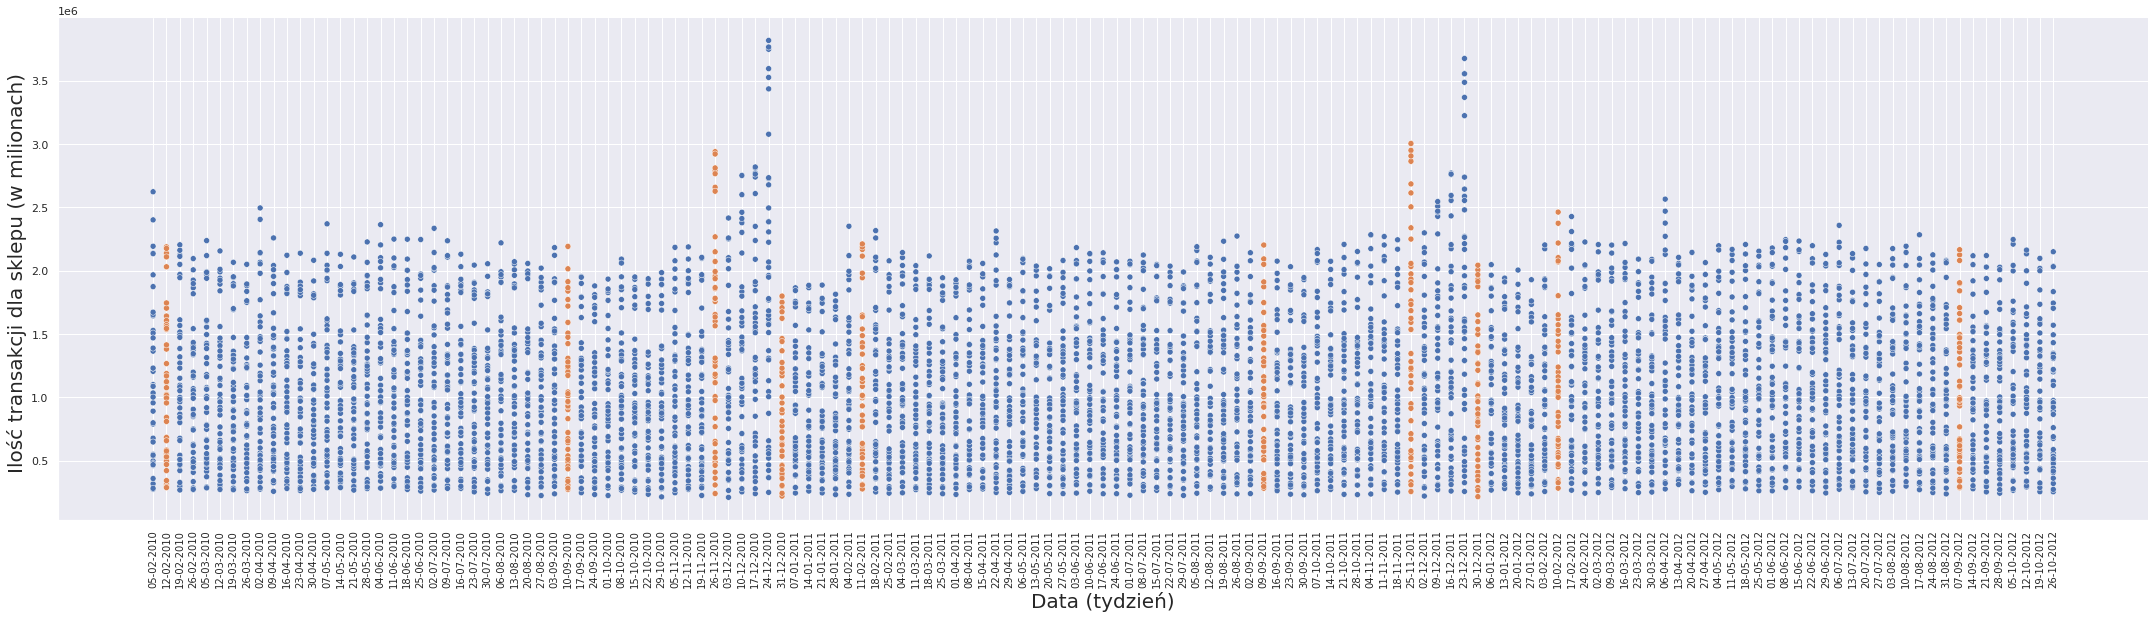

In [8]:
#Wykres 5
#Zaznaczenie tygodni w których występuje jakieś święto z kolumny Holiday_Flag.

sns.relplot(x="Date", y="Weekly_Sales", hue="Holiday_Flag", sizes=(15, 200), data=train, height=8, aspect=30/8, legend=False)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90, fontsize='10')
plt.xlabel('Data (tydzień)', fontsize=20)
plt.ylabel('Ilość transakcji dla sklepu (w milionach) ', fontsize=20)




Text(8.95999999999998, 0.5, 'Ilość transakcji dla sklepu (w milionach) ')

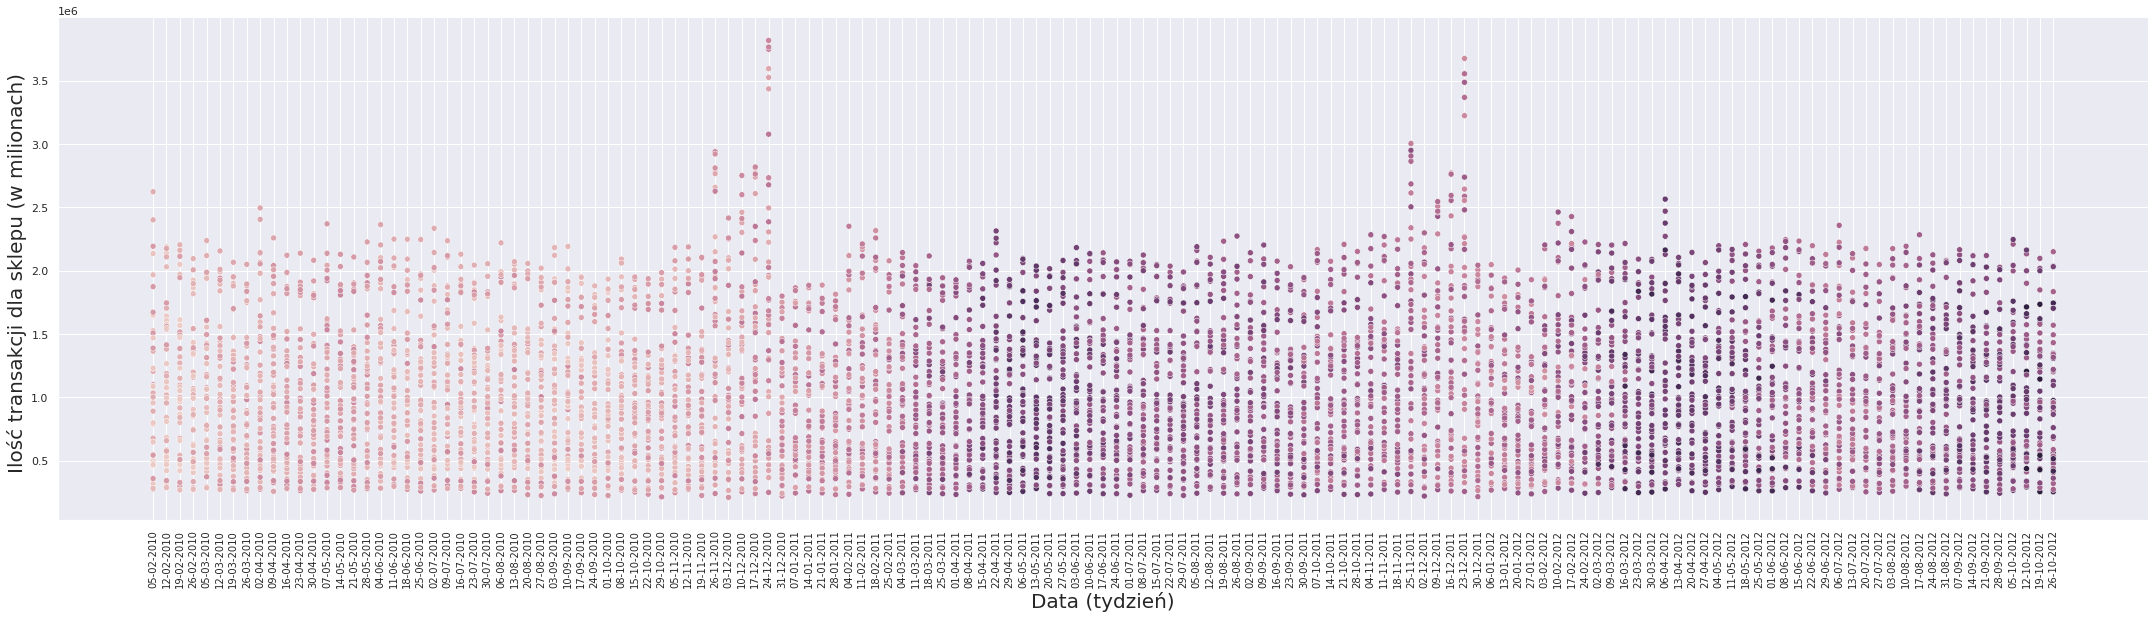

In [9]:
#Wykres 6
#Uwzgldnienie cen paliwa dla transakcji w danym okresie czasu.

sns.relplot(x="Date", y="Weekly_Sales", hue="Fuel_Price", sizes=(15, 200), data=train, height=8, aspect=30/8, legend=False)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90, fontsize='10')
plt.xlabel('Data (tydzień)', fontsize=20)
plt.ylabel('Ilość transakcji dla sklepu (w milionach) ', fontsize=20)

In [10]:
#Regresja logistyczna dla szukanego 'Holiday_Flag'.

cols = ["Store", "Date", "Weekly_Sales", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]
data = base_data[cols].copy()

data.isnull().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

In [11]:
#biblioteki 

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline


In [12]:
print(train)

      Store        Date  Weekly_Sales  ...  Fuel_Price         CPI  Unemployment
0         1  05-02-2010    1643690.90  ...       2.572  211.096358         8.106
1         1  12-02-2010    1641957.44  ...       2.548  211.242170         8.106
2         1  19-02-2010    1611968.17  ...       2.514  211.289143         8.106
3         1  26-02-2010    1409727.59  ...       2.561  211.319643         8.106
4         1  05-03-2010    1554806.68  ...       2.625  211.350143         8.106
...     ...         ...           ...  ...         ...         ...           ...
6430     45  28-09-2012     713173.95  ...       3.997  192.013558         8.684
6431     45  05-10-2012     733455.07  ...       3.985  192.170412         8.667
6432     45  12-10-2012     734464.36  ...       4.000  192.327265         8.667
6433     45  19-10-2012     718125.53  ...       3.969  192.330854         8.667
6434     45  26-10-2012     760281.43  ...       3.882  192.308899         8.667

[6435 rows x 8 columns]


In [13]:
encoder = LabelEncoder()
train.loc[:,"Date"] = encoder.fit_transform(data.loc[:,"Date"])


X = train.drop('Holiday_Flag', axis=1)
y = train['Holiday_Flag']

X_train, X_test, y_train, y_test = train_test_split(train.drop('Holiday_Flag',axis=1), 
                                                    train['Holiday_Flag'], test_size=0.10, 
                                                    random_state=101)

logmodel = LogisticRegression(max_iter = 20)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       591
           1       0.00      0.00      0.00        53

    accuracy                           0.92       644
   macro avg       0.46      0.50      0.48       644
weighted avg       0.84      0.92      0.88       644



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [15]:
confusion_matrix(y_test, predictions)

array([[591,   0],
       [ 53,   0]])

In [16]:
#Sieci neuronowe dla szukanego 'Holiday_Flag'.

base_data = pd.read_csv("Walmart2.csv")
base_data.columns

cols = ["Holiday_Flag", "Store", "Date", "Weekly_Sales", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]
data2 = base_data[cols].copy()

data2.isnull().any()

encoder = LabelEncoder()
data2.loc[:,"Date"] = encoder.fit_transform(data2.loc[:,"Date"])


In [ ]:
data2

,Holiday_Flag,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,1,19,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1,52,1641957.44,1,38.51,2.548,211.242170,8.106
2,0,1,85,1611968.17,0,39.93,2.514,211.289143,8.106
3,0,1,118,1409727.59,0,46.63,2.561,211.319643,8.106
4,0,1,20,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...
6430,0,45,130,713173.95,0,64.88,3.997,192.013558,8.684
6431,0,45,22,733455.07,0,64.89,3.985,192.170412,8.667
6432,0,45,55,734464.36,0,54.47,4.000,192.327265,8.667
6433,0,45,88,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
print(data2.iloc[:,1:9])

      Store  Date  Weekly_Sales  ...  Fuel_Price         CPI  Unemployment
0         1    19    1643690.90  ...       2.572  211.096358         8.106
1         1    52    1641957.44  ...       2.548  211.242170         8.106
2         1    85    1611968.17  ...       2.514  211.289143         8.106
3         1   118    1409727.59  ...       2.561  211.319643         8.106
4         1    20    1554806.68  ...       2.625  211.350143         8.106
...     ...   ...           ...  ...         ...         ...           ...
6430     45   130     713173.95  ...       3.997  192.013558         8.684
6431     45    22     733455.07  ...       3.985  192.170412         8.667
6432     45    55     734464.36  ...       4.000  192.327265         8.667
6433     45    88     718125.53  ...       3.969  192.330854         8.667
6434     45   121     760281.43  ...       3.882  192.308899         8.667

[6435 rows x 8 columns]


In [ ]:
y = data2.iloc[:,0]
x = data2.iloc[:,1:8]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [ ]:
model = Sequential()


model.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7)) 
model.add(Dense(3, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))


model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 6)                 48        
                                                                 
 dense_79 (Dense)            (None, 3)                 21        
                                                                 
 dense_80 (Dense)            (None, 1)                 4         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 30, epochs = 10)

Epoch 1/10
194/194 [==============================] - 1s 2ms/step - loss: 0.5079 - accuracy: 0.9119
Epoch 2/10
194/194 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.9268
Epoch 3/10
194/194 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.9302
Epoch 4/10
194/194 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.9302
Epoch 5/10
194/194 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.9302
Epoch 6/10
194/194 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.9302
Epoch 7/10
194/194 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.9302
Epoch 8/10
194/194 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.9302
Epoch 9/10
194/194 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.9302
Epoch 10/10
194/194 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.9302